In [25]:
from toybox.interventions.amidar import *
from toybox.interventions.base import *
from toybox.interventions.core import * 
from toybox import Toybox, Input

import numpy as np
import math
from matplotlib.pyplot import imshow, subplots, tight_layout
import random

In [26]:
def calc_distance(one, two):
    
    return abs(one.tx -  two.tx) + abs(one.ty - two.ty)

In [53]:
def opposite_dir(move): #returns an input object with the opposite direction
    
    if move.up:
        move.up, move.down = False, True
    elif move.down:
        move.down, move.up = False, True
    elif move.right:
        move.right, move.left = False, True
    elif move.left:
        move.left, move.right = False, True
    
    return move

TilePoint {tx: 31, ty: 12} {'left': False, 'right': False, 'up': True, 'down': False, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 10} {'left': False, 'right': False, 'up': True, 'down': False, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 8} {'left': False, 'right': False, 'up': False, 'down': True, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 10} {'left': False, 'right': False, 'up': True, 'down': False, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 9} {'left': False, 'right': False, 'up': False, 'down': True, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 10} {'left': False, 'right': False, 'up': True, 'down': False, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 9} {'left': False, 'right': False, 'up': False, 'down': True, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 11} {'left': False, 'right': False, 'up': True, 'down': False, 'button1': False, 'button2': False}
TilePoint {tx: 31, ty: 10} 

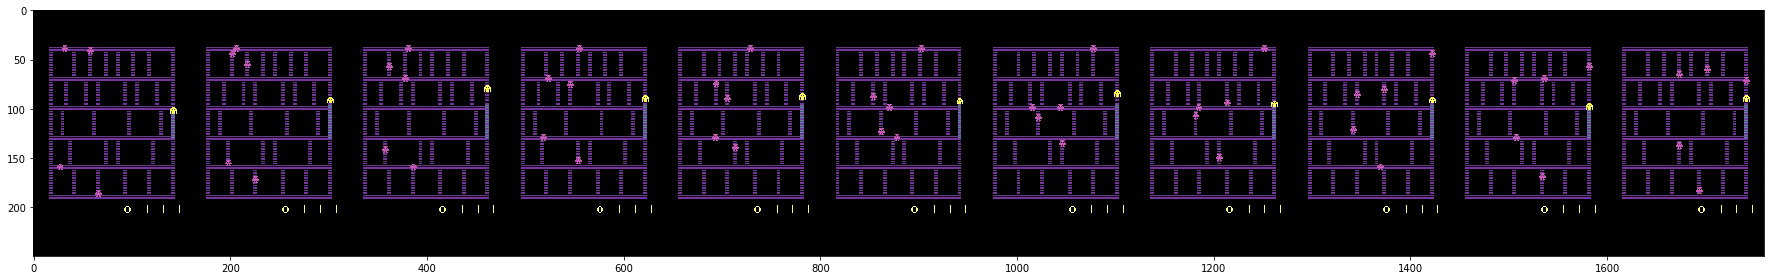

In [60]:
move = Input()
move.up = True

frames = []


with Toybox('amidar') as tb:    
    
    for i in range(300):
        tb.apply_action(move)
        
        
        if i % 25 == 0 and i > 0 :
            with AmidarIntervention(tb) as intervention: 

                    game = intervention.game

                    player_pos = intervention.worldpoint_to_tilepoint(game.player.position)            
                    enemy_pos_0 = intervention.worldpoint_to_tilepoint(game.enemies[0].position)
                    enemy_pos_1 = intervention.worldpoint_to_tilepoint(game.enemies[1].position) 
                    enemy_pos_2 = intervention.worldpoint_to_tilepoint(game.enemies[2].position)  
                    enemy_pos_3 = intervention.worldpoint_to_tilepoint(game.enemies[3].position) 

                                    #Returns the Manhattan distance of the closest enemy to the agent
                    closest_dist = min(calc_distance(player_pos, enemy_pos_0), calc_distance(player_pos, enemy_pos_1), 
                                            calc_distance(player_pos, enemy_pos_2), calc_distance(player_pos, enemy_pos_3))

                    if closest_dist <= 25:
                        move = opposite_dir(move)

                    print(player_pos, move)
                    frames.append(tb.get_rgb_frame())



        
subplots(figsize=(len(frames)*3, 4))
imshow(np.hstack(frames))
tight_layout() # makes it a little bigger.